In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
forest=pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# **EDA and Feature Engineering**

In [ ]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [ ]:
forest.info() #517 rows, 31 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest[forest.duplicated()].shape #8 duplicate rows

(8, 31)

In [ ]:
data = forest.drop_duplicates() #dropping duplicate rows

In [ ]:
data.info() #509 rows after dropping duplicate rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [ ]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Dropping unnecessary columns

data1 = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],
                 axis = 1)
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
data1.info() #12 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 51.7+ KB


In [ ]:
data1[data1.duplicated()] #no duplicate rows

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


In [ ]:
# Checking how much datapoints are having small and large area
data1.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [ ]:
data1.corr()

<ipython-input-16-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


# **Visualization**

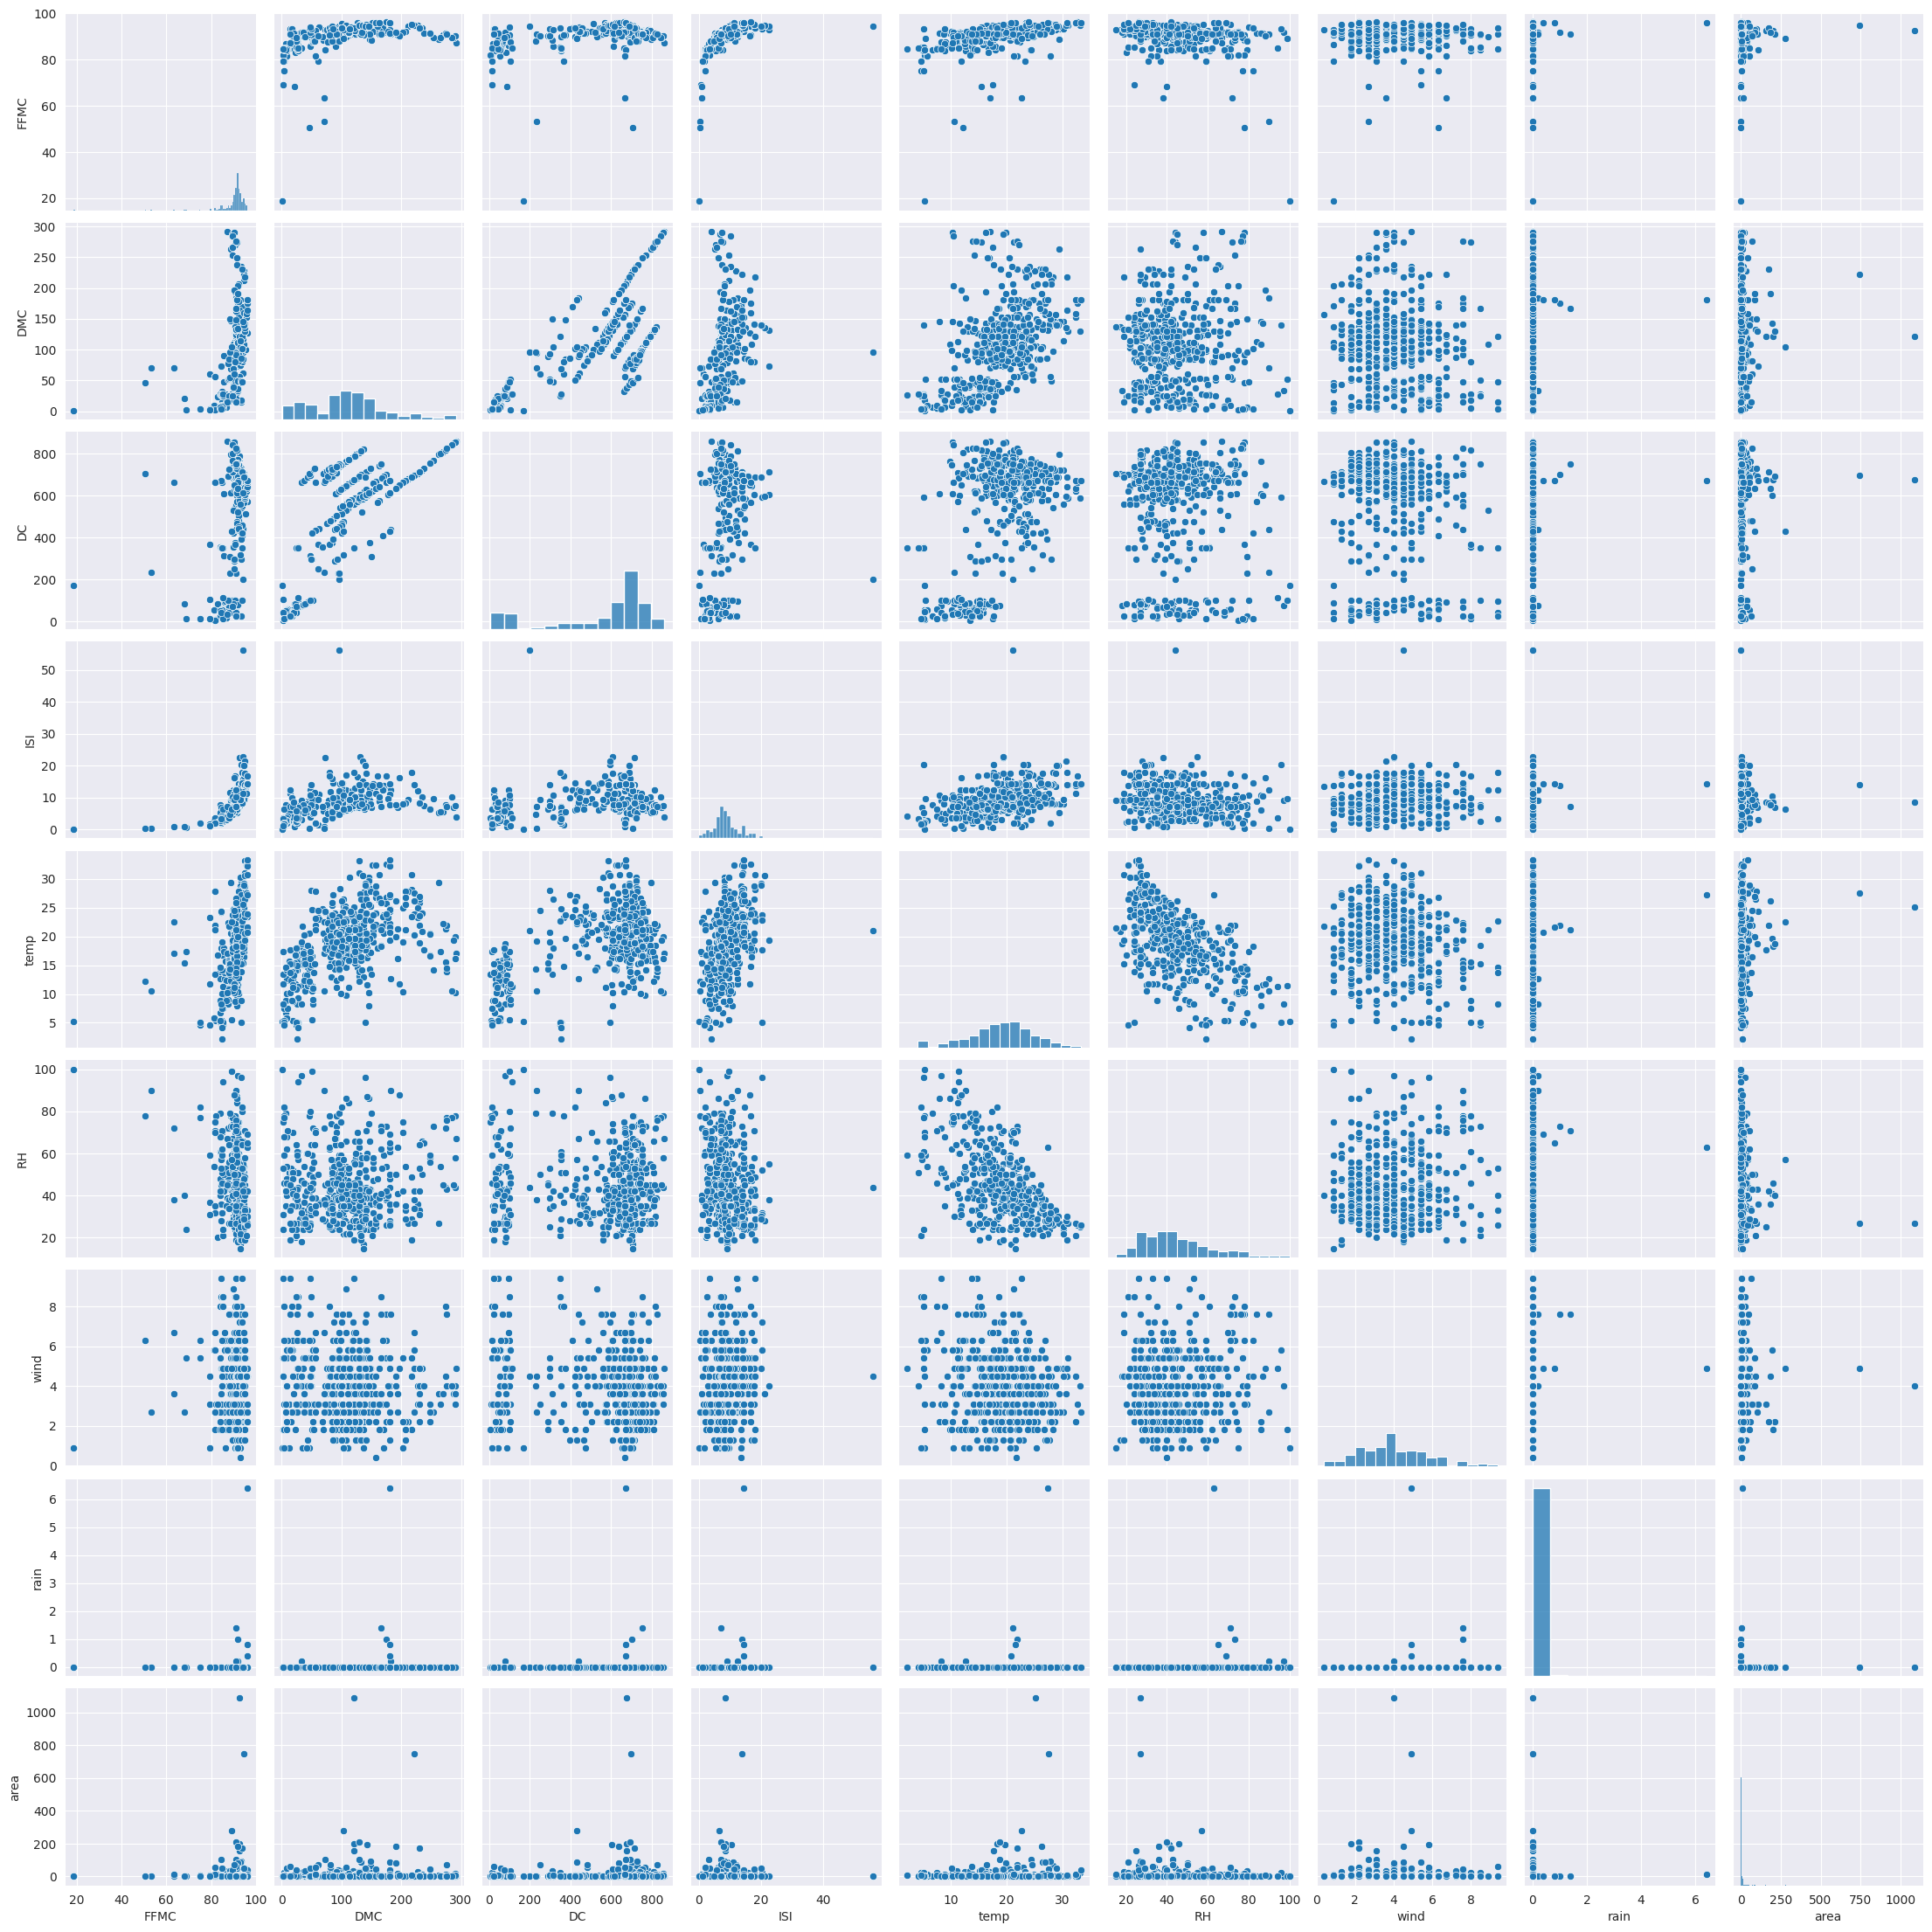

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

<Axes: xlabel='size_category', ylabel='count'>

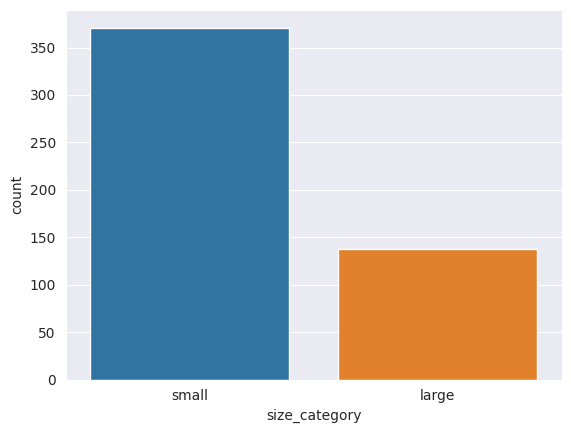

In [ ]:
sns.countplot(x = 'size_category', data = data1)

<ipython-input-19-0c840dab660b>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='month',y='temp', data=data1,


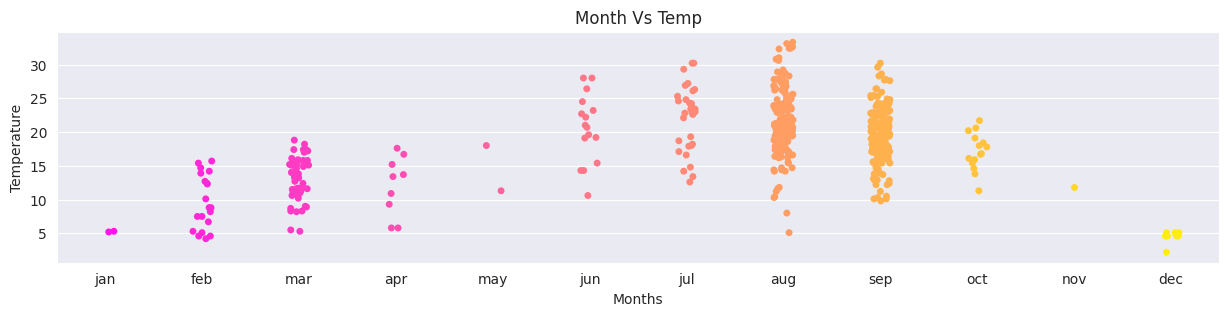

In [ ]:
# Plotting Month Vs. temp plot -> barplot
fig = plt.figure(figsize=(15,3))
sns.set_style(style = "darkgrid")
sns.stripplot(x='month',y='temp', data=data1,
               order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'spring', jitter=True)
plt.title('Month Vs Temp')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

<ipython-input-20-29a8d619898b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cmap="inferno")


Text(0.5, 1.0, 'HeatMap of Features for the Classes')

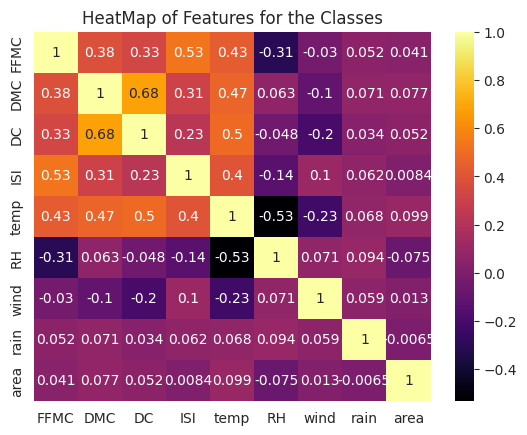

In [ ]:
sns.heatmap(data1.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [ ]:
# Encoding month and day features

data1.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data1.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [ ]:
label = preprocessing.LabelEncoder()
data1['size_category'] = label.fit_transform(data1['size_category'])

In [ ]:
data1.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
56,9,2,90.3,80.7,730.2,6.3,17.8,63,4.9,0.0,0.0,1
47,7,1,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,0.0,1
288,7,6,91.6,104.2,474.9,9.0,24.2,32,1.8,0.0,0.0,1
107,8,7,90.2,99.6,631.2,6.3,21.4,33,3.1,0.0,0.0,1
435,7,6,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0.0,1


# **Feature Scaling**

In [ ]:
data2 = data1.iloc[:, 0:11]
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
array = data2.values
array

array([[ 3.  ,  5.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  6.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 8.  ,  7.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 8.  ,  6.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [11.  ,  2.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [ ]:
#standardizing data
scaler=StandardScaler()
X = scaler.fit_transform(array)
X

array([[-1.96435265,  0.36038654, -0.79603981, ...,  1.49437016,
        -0.06903477, -0.20279135],
       [ 1.10403336, -1.08399732, -0.00325666, ..., -1.72936355,
        -0.06903477, -0.20279135],
       [ 1.10403336,  0.84184783, -0.00325666, ..., -1.50703709,
        -0.06903477, -0.20279135],
       ...,
       [ 0.22735164,  1.32330912, -1.62485856, ...,  1.49437016,
        -0.06903477, -0.02860775],
       [ 0.22735164,  0.84184783,  0.68141971, ..., -0.00633347,
        -0.06903477, -0.20279135],
       [ 1.54237422, -1.08399732, -2.00323234, ...,  0.27157461,
        -0.06903477, -0.20279135]])

In [ ]:
SVM=pd.DataFrame(X, columns=data1.columns[:-1])
SVM

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.964353,0.360387,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791
1,1.104033,-1.083997,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791
2,1.104033,0.841848,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791
3,-1.964353,0.360387,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791
4,-1.964353,1.323309,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791
...,...,...,...,...,...,...,...,...,...,...,...
504,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277
505,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559
506,0.227352,1.323309,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608
507,0.227352,0.841848,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791


In [ ]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(SVM,data1['size_category'], test_size=0.3, random_state=42) #70% data will be train data

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (356, 11)
Shape of x_test:  (153, 11)
Shape of y_train:  (356,)
Shape of y_test:  (153,)


# **Randomized Search CV**

In [37]:
classifier = SVC()
param_grid=[{'kernel':['linear', 'rbf'],'gamma':[0.5, 0.1, 0.01], 'C':[10, 0.1, 0.001, 0.0001]}]
#3 hyperparameters-> kernel, gamma, C
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 1/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 2/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 3/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 4/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 5/10; 1/10] END C=10, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 6/10; 1/10] START C=10, gamma=0.1, kernel=linear............................
[CV 6/10; 1/10] END C=10, gamma

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [38]:
gsv.best_params_, gsv.best_score_

({'kernel': 'linear', 'gamma': 0.1, 'C': 10}, 0.9747619047619047)

# **Building SVM Model**

In [39]:
clf=SVC(kernel='linear', C=10)
clf.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [40]:
y_pred=clf.predict(x_test)

In [41]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
acc=accuracy_score(y_test, y_pred)*100
acc

93.4640522875817

In [43]:
confusion_matrix(y_test, y_pred) #143 correct predictions and 10 wrong predictions

array([[ 35,   9],
       [  1, 108]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        44
           1       0.92      0.99      0.96       109

    accuracy                           0.93       153
   macro avg       0.95      0.89      0.92       153
weighted avg       0.94      0.93      0.93       153

